# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_targets.csv, test_inputs.csv, test_targets.csv) in the colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [136]:
from google.colab import files
uploaded = files.upload()
%ls

Saving test_inputs.csv to test_inputs.csv
Saving test_targets.csv to test_targets.csv
Saving train_inputs.csv to train_inputs.csv
Saving train_targets.csv to train_targets.csv
sample_data/     test_targets.csv  train_targets.csv
test_inputs.csv  train_inputs.csv


# Import libraries 
Do not use any other Python library.

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Function: load_linear_regression_data

This function loads the data for Linear Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_targets**: numpy array of N training targets
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_targets**: numpy array of N' test targets

In [149]:
def load_linear_regression_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_targets = np.genfromtxt('test_targets.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_targets = np.genfromtxt('train_targets.csv', delimiter=',')
  return train_inputs, train_targets, test_inputs, test_targets


# Function: predict_linear_regression

This function uses a vector of weights to make predictions for a set of inputs.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)

Output:
*   **predicted_values**: vector of predicted values (numpy array of N floats)

In [152]:
def predict_linear_regression(inputs, weights):

  predicted_values=weights.T.dot(inputs.T)
  #predicted_values = np.zeros(inputs.shape[0])
  return predicted_values
pred=predict_linear_regression(train_inputs,weights) 

# Function eval_linear_regression

This function evaluates a set of predictions by computing the mean squared error with respect to the targets

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)
*   **targets**: vector of targets associated with the inputs (numpy array of N targets)

Output:
*   **mean_squared_error**: mean squared error between the predicted values and the targets (scalar)

In [153]:
def eval_linear_regression(inputs, weights, targets):
  error=(targets.flatten()- predict_linear_regression(inputs,weights))
  mean_squared_error=(1.0/len(inputs))*np.sum(np.power(error,2))
  # dummy assignment until the function is filled in
  #mean_squared_error = 0
  return mean_squared_error
eval=eval_linear_regression(train_inputs,weights,train_targets)
print(eval)

1.3050634702080106


# Function train_linear_regression

This function optimizes a set of weights for linear regression based on a training set

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_targets**: vector of targets associated with the inputs (numpy array of N targets)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)



In [154]:
def train_linear_regression(train_inputs, train_targets, lambda_hyperparam):
  
  #x=np.append(np.ones([train_inputs.shape[0],1]), train_inputs, axis=1).T

  x=train_inputs.T
  A=np.zeros([x.shape[0], x.shape[0]])
  b=np.zeros(x.shape[0])
  for i in range(x.shape[1]):
    x_p=np.reshape(x[:,i],[x[:,i].shape[0],1])
    A += x_p.dot(x_p.T)
    b += train_targets[i] * x[:,i]
  A=lambda_hyperparam * np.eye(x.shape[0])+A
  weights=np.linalg.inv(A).dot(b)
  return weights
  #weights = np.zeros(train_inputs.shape[1])
  #return weights

weights = train_linear_regression(train_inputs,train_targets,0.1)
print(weights)

[ 0.4526466   1.53654168 -0.84843125]


# Function cross_validation_linear_regression

This function performs k-fold cross validation to determine the best lambda hyperparameter in linear regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **inputs**: matrix of input points (numpy array of N data points by M+1 features)
*   **targets**: vector of targets associated with the inputs (numpy array of N targets)

Outputs:
*   **best_hyperparam**: best lambda value for linear regression (float)
*   **best_mean_squared_error**: mean squared error achieved with best_hyperparam (float)
*   **mean_squared_errors**: vector of mean squared errors for the corresponding hyperparameters (numpy array of floats)



In [119]:
import copy
def cross_validation_linear_regression(k_folds, hyperparameters, inputs, targets):
  dataset= np.concatenate((train_inputs,train_targets.reshape(-1,1)),axis=1)
  np.random.shuffle(dataset)
  k_folds=10
  dataset_split= np.split(dataset,k_folds)
  error_result=[]
  for lambda_param in hyperparameters:
    param_error = []
    for i in range(k_folds):
      dataset_copy = copy.deepcopy(dataset_split)
      test =np.array(dataset_copy.pop(i))
      train=np.array(dataset_copy)
      train= train.reshape(train.shape[0]*train.shape[1],train.shape[2])
  
      weights=train_linear_regression(train[:,:-1],train[:,-1],lambda_param)
      predicted_values=predict_linear_regression(train[:,:-1],weights)
      error=eval_linear_regression(test[:,:-1],weights,test[:,-1])
      param_error.append(error)
    error_result.append(np.mean(param_error))
  print(error_result)
  best_mean_squared_error = np.min(error_result)
  best_hyperparam= hyperparameters[error_result.index(best_mean_squared_error)]
  mean_squared_errors = error_result
  return best_hyperparam, best_mean_squared_error, mean_squared_errors
cross_validation_linear_regression(10,[0.1], train_inputs,train_targets)

[1.571545470587467]


(0.1, 1.571545470587467, [1.571545470587467])

# Function: plot_linear_regression_mean_squared_errors

Function that plots the mean squared errors for different lambda values (hyperparameters) in linear regression based on cross validation

Inputs:
*   **mean_squared_errors**: vector of mean squared errors for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)

In [146]:
def plot_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams):
  plt.plot(hyperparams,mean_squared_errors)
  plt.ylabel('mean squared error')
  plt.xlabel('lambda')
  plt.show()

# Main Linear Regression code

Load data.
Use k-fold cross validation to find the best lambda value for linear regression.
Plot mean squared errors for different lambda values.
Test linear regression with the best lambda value.

[1.3274683424961995, 1.327352177209843, 1.3272708975947134, 1.3272227095512181, 1.3272059125693159, 1.327218894308761, 1.327260125530922, 1.327328155356771, 1.3274216068276803, 1.3275391727474912, 1.3276796117860346, 1.3278417448257926, 1.3280244515348443, 1.3282266671504903, 1.3284473794591696, 1.3286856259593403, 1.3289404911950171, 1.3292111042485517, 1.3294966363820995, 1.329796298817977, 1.3301093406488325, 1.3304350468692014, 1.3307727365206294, 1.3311217609430863, 1.3314815021259296, 1.3318513711521192, 1.3322308067298558, 1.3326192738061866, 1.3330162622575206, 1.3334212856523222, 1.3338338800815874]


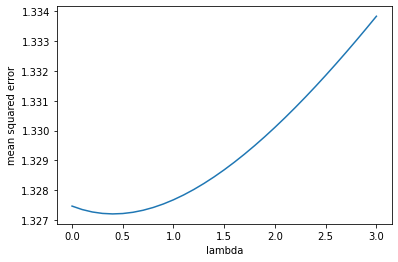

best lambda: 0.4
best cross validation mean squared error: 1.3272059125693159
test mean squared error: 1.4438519571401278


In [151]:
# load data
train_inputs, train_targets, test_inputs, test_targets = load_linear_regression_data()

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# lambda values to be evaluated by cross validation
hyperparams = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
k_folds = 10
best_lambda, best_mean_squared_error, mean_squared_errors = cross_validation_linear_regression(k_folds,hyperparams,train_inputs,train_targets)

# plot results
plot_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams)
print('best lambda: ' + str (best_lambda))
print('best cross validation mean squared error: ' + str(best_mean_squared_error))

# train and evaluate with best lambda
weights = train_linear_regression(train_inputs,train_targets,best_lambda)
mean_squared_error = eval_linear_regression(test_inputs, weights, test_targets)
print('test mean squared error: ' + str(mean_squared_error))

